c:\python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


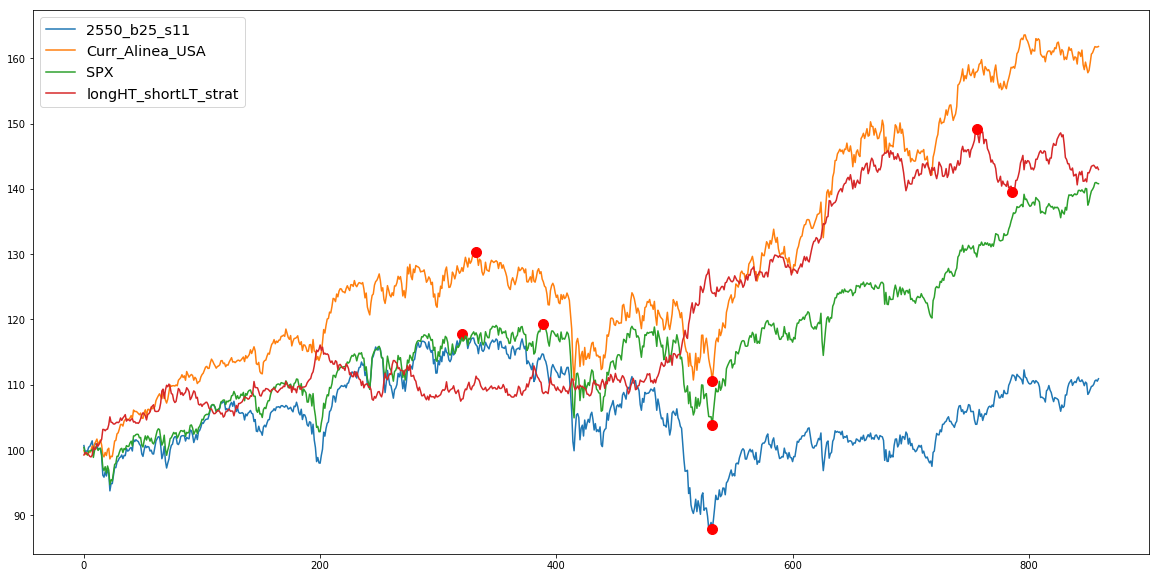

All Done!


In [28]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

import datetime
from datetime import datetime

import math


### Read in data ###
file_path = r"C:\Users\danie\OneDrive\NON-PERSONAL\Education\Programming\dnPythonFiles\learningPython\dn_jupyter_files"
file_name = "fipe_ls_alt_2.csv"
df = pd.read_csv(file_path+"\\"+file_name)


### Drop rows with NaN -- Make df symetric ###
df.dropna(axis=0, how='any', inplace=True )


### Turn dates into datetime types ###
# print(df.loc[0,'Date'])
# type(df.loc[0,'Date'])
df['Date'] = pd.to_datetime(df['Date'])

### Re-base pct changes to index ###
def createIndex(column_name, ref_column_num):
    index_lvl = 100
    for i in range(df.shape[0]):
        index_lvl = index_lvl * (1 + df.iloc[i,ref_column_num])
        df.loc[i,column_name] = index_lvl

strategies = ['2550_b25_s11', 
              'Curr_Alinea_USA', 
              'SPX',
             'longHT_shortLT_strat']

strat_num = 0
for strategy in strategies:
    strat_num += 1
    createIndex(strategy,strat_num)

### Graph Equity Curve ###
# for strategy in strategies:
#     df[strategy].plot(grid=True, label=strategy)

n = df.shape[0]
for strategy in strategies:
    xs = df.loc[:,strategy]# timeseries
    i = np.argmax(np.maximum.accumulate(xs) - xs) # end of the period
    j = np.argmax(xs[:i]) # start of period
    plt.plot(xs, label=strategy)
    plt.plot([i, j], [xs[i], xs[j]], 'o', color='Red', markersize=10)
    

plt.legend(fontsize = 'x-large')
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()

print("All Done!")

In [30]:
### Risk Return Stats ###
stats_df = pd.DataFrame()
stats_df.loc[0,'Item'] = 'Total Return %'
stats_df.loc[1,'Item'] = 'Annualized Return %'
stats_df.loc[2,'Item'] = 'Annulaized STDEV %'
stats_df.loc[3,'Item'] = 'Return / Risk'
# TODO --> Create DF with
stats_df.loc[4,'Item'] = 'Annualized Downward STDEV %'
stats_df.loc[5,'Item'] = 'MDD'
stats_df.loc[6,'Item'] = ' MDD Days to recovery'

stats_df.loc[7,'Item'] = 'Daily Return Fraction +ve'
stats_df.loc[8,'Item'] = 'Avg. Daily Return %'
stats_df.loc[9,'Item'] = 'Min. Daily Return %'
stats_df.loc[10,'Item'] = 'Max. Daily Return %'

stats_df.loc[11,'Item'] = 'Monthly Return Fraction +ve'
stats_df.loc[12,'Item'] = 'Avg. Monthly Return %'
stats_df.loc[13,'Item'] = 'Min. Monthly Return %'
stats_df.loc[14,'Item'] = 'Max. Monthly Return %'



for strategy in strategies:
    total_return = ((df.loc[df.shape[0]-1,strategy] / df.loc[1,strategy]) - 1)
    stats_df[strategy] = pd.DataFrame({strategy:[round(total_return * 100, 2)]})

    
from_date = df.loc[1,'Date']
to_date = df.loc[df.shape[0]-1,'Date']
months_in_df = ((to_date - from_date).days)/30


for strategy in strategies:
    total_return = ((df.loc[df.shape[0]-1,strategy] / df.loc[1,strategy]) - 1)
    ann_return = ((1 + total_return) ** (12 / float(months_in_df)) - 1)
    stats_df.loc[1,strategy] = round(ann_return * 100, 2)


strat_count = len(strategies)
for i in range(1,strat_count+1):
    stdev = df.iloc[:,i].std() * math.sqrt(252)
    stats_df.iloc[2,i] = round(stdev * 100, 2)

    
for strategy in strategies:
    return_risk = stats_df.loc[1,strategy] / float(stats_df.loc[2,strategy])
    stats_df.loc[3,strategy] = round(return_risk * 100, 2)


    
stats_df

,Item,2550_b25_s11,Curr_Alinea_USA,SPX,longHT_shortLT_strat
0,Total Return %,11.24,62.89,41.46,43.52
1,Annualized Return %,3.13,15.15,10.55,11.01
2,Annulaized STDEV %,14.45,12.76,12.81,8.48
3,Return / Risk,21.66,118.73,82.36,129.83
4,Annualized Downward STDEV %,NaN,NaN,NaN,NaN
5,MDD,NaN,NaN,NaN,NaN
6,MDD Days to recovery,NaN,NaN,NaN,NaN
7,Daily Return Fraction +ve,NaN,NaN,NaN,NaN
8,Avg. Daily Return %,NaN,NaN,NaN,NaN
9,Min. Daily Return %,NaN,NaN,NaN,NaN


In [31]:
# ### MDD Calc
# ### https://quant.stackexchange.com/questions/18094/how-can-i-calculate-the-maximum-drawdown-mdd-in-python

# # Get SPY data for past several years
# index_ts = df.iloc[:,4:5]

# # We are going to use a trailing 252 trading day window
# window = 252

# # Calculate the max drawdown in the past window days for each day in the series.
# # Use min_periods=1 if you want to let the first 252 days data have an expanding window
# roll_max = pd.rolling_max(index_ts, window, min_periods=1)
# daily_drawdown = index_ts / roll_max - 1.0

# # Next we calculate the minimum (negative) daily drawdown in that window.
# # Again, use min_periods=1 if you want to allow the expanding window
# max_daily_drawdown = pd.rolling_min(daily_drawdown, window, min_periods=1)

# # Plot the results
# daily_drawdown.plot()
# # max_daily_drawdown.plot()
# plt.show()
# # Which yields (Blue is daily running 252-day drawdown, green is maximum experienced 252-day drawdown in the past year):

c:\python36\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_max is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=252,min_periods=1,center=False).max()
  if sys.path[0] == '':
c:\python36\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: pd.rolling_min is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=252,min_periods=1,center=False).min()
  


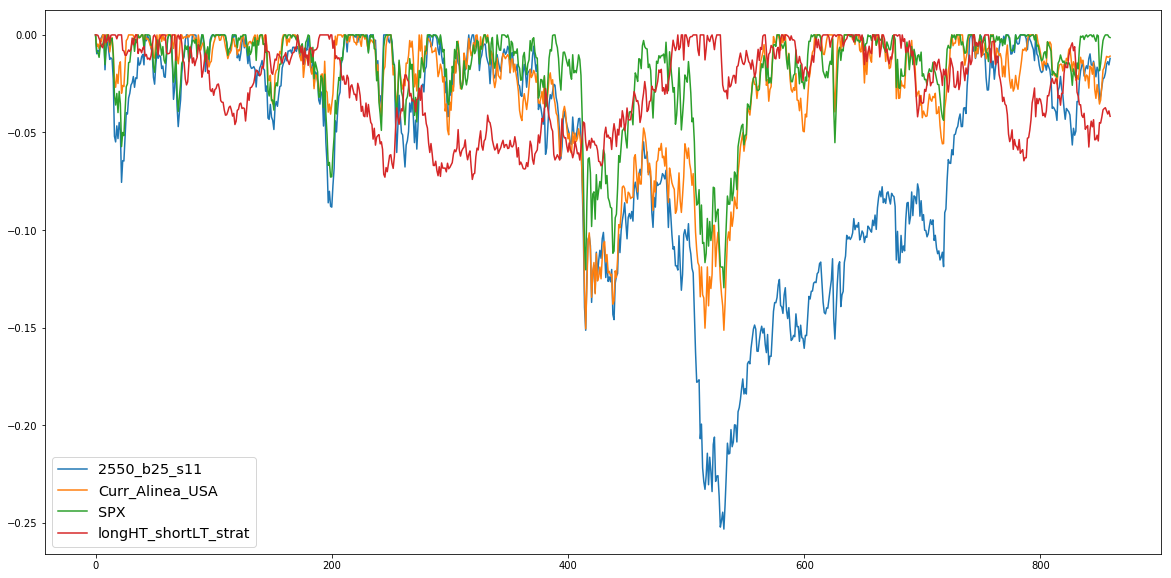

In [32]:
### MDD Calc
### https://quant.stackexchange.com/questions/18094/how-can-i-calculate-the-maximum-drawdown-mdd-in-python
 
df_from = len(strategies) + 1 
df_to = df.shape[1] 


for i in range(df_from,df_to):
    index_ts = df.iloc[:,i:i+1]
    for strategy in strategies:
        window = 252
        roll_max = pd.rolling_max(index_ts, window, min_periods=1)
        daily_drawdown = index_ts / roll_max - 1.0
        max_daily_drawdown = pd.rolling_min(daily_drawdown, window, min_periods=1)
        
    plt.plot(daily_drawdown, label=strategies[i-df_from])
    plt.legend(fontsize = 'x-large') 

# Plot the results
plt.show()

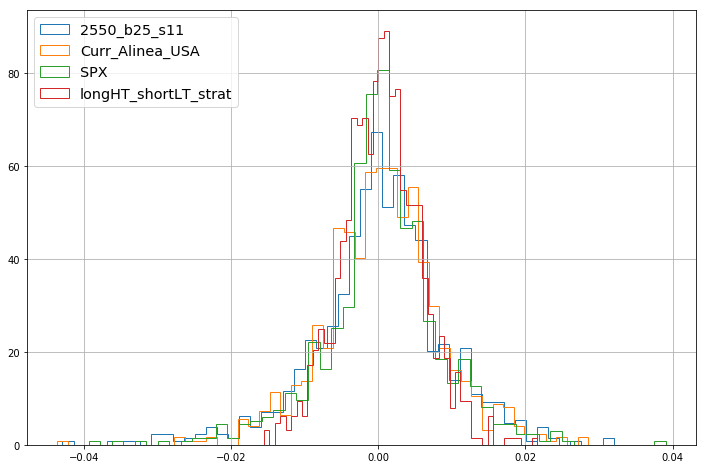

In [46]:
### Distribution of daily returns ###

def plotHist(i):
    df_pct_chg = df.iloc[:,i]
    df_pct_chg.hist(bins=50, figsize=(12,8), histtype='step',label=strategies[i-1], normed=True)

strategies_len = len(strategies)
for i in range(1,(strategies_len + 1)):
    plotHist(i)


plt.legend(fontsize = 'x-large')
plt.show()


In [10]:
#### You can plot the Ordinary Least-Squares Regression with the help of Matplotlib: ###

# # Import matplotlib
# import matplotlib.pyplot as plt

# # Plot returns of AAPL and MSFT
# plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

# # Add an axis to the plot
# ax = plt.axis()

# # Initialize `x`
# x = np.linspace(ax[0], ax[1] + 0.01)

# # Plot the regression line
# plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# # Customize the plot
# plt.grid(True)
# plt.axis('tight')
# plt.xlabel('Apple Returns')
# plt.ylabel('Microsoft returns')

# # Show the plot
# plt.show()

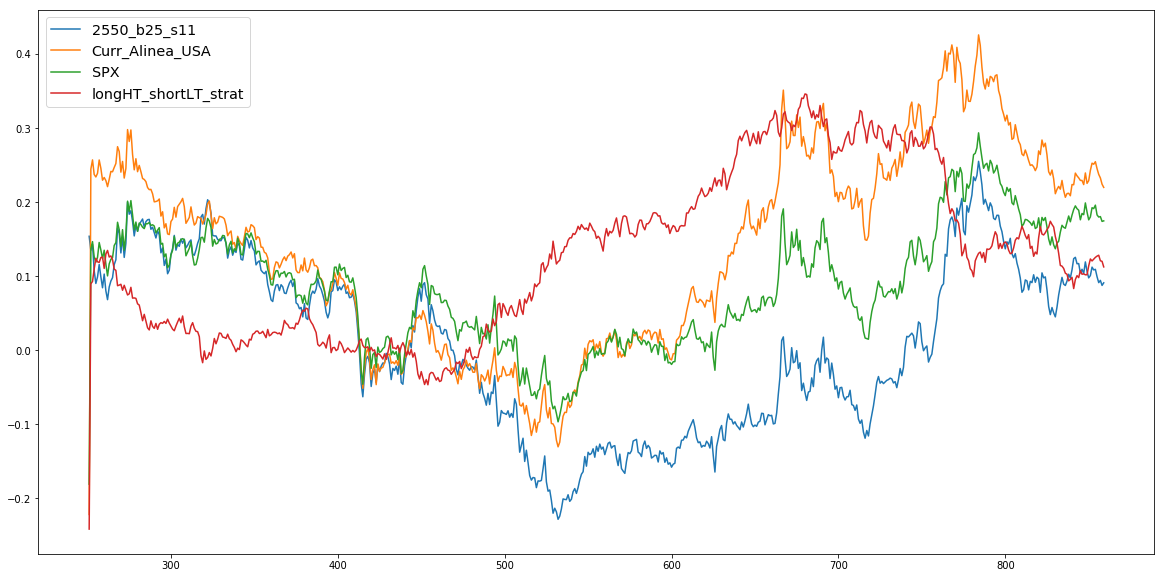

In [34]:
### rolling 1 year return ###

strat_count = len(strategies)
window = 251
df_rows = df.shape[0]
index_lvl = 100

for strategy in strategies:
    strat_count += 1
    for i in range(window, df_rows):
        if index_lvl == 100:
            roll_252d_ret = df.iloc[i,strat_count] / index_lvl  - 1
            df.loc[i,strategy+'_252d'] = roll_252d_ret
            index_lvl += 999999
        else:
            roll_252d_ret = df.iloc[i,strat_count] / df.iloc[i-252,strat_count]  - 1
            df.loc[i,strategy+'_252d'] = roll_252d_ret
    plt.plot(df[strategy+'_252d'], label=strategy)
    
plt.legend(fontsize = 'x-large')
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()


# df['252d'] = np.round(df['U1.25.T.50.WIN.25.11.daily_ret'].rolling(window=252).mean(),2)


In [12]:
rolling 1 year hit ratio


SyntaxError: invalid syntax (<ipython-input-12-38b167d0da2c>, line 1)

In [ ]:

rolling 1 year volatility

